#**Drug Discovery of Penicillin binding protein 2b PART 2**

#Exploratory Data Analysis
A statistical method that analyze data sets to summarize their main characteristics, often with visual methods. This is the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis, etc. 

In [1]:
#Libraries
import pandas as pd
import seaborn as sns


##Import conda packages 

In [2]:
#reference code: "https://colab.research.google.com/github/dataprofessor/code/blob/master/python/CDD_ML_Part_2_Exploratory_Data_Analysis.ipynb#scrollTo=o-4IOizard4P"
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2020-12-13 20:12:11--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   170MB/s    in 0.5s    

2020-12-13 20:12:11 (170 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b64

##Load csv File

Steps:
1. mount gdrive.
2. see the list by using '!ls' command and look for the csv file of interest.
3. load the csv file containing bioactivity data into a new dataframe using pandas. (if it is still showing "FileNotFound error" then download the file, rename it, upload it and then load)

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [4]:
!ls "/content/gdrive/My Drive/Colab Notebooks/"

'Copy of Influenza A_edited_Data analysis.ipynb'
'Copy of Influenza A edited.ipynb'
'Copy of Penicillin_Bioactivity_Data (1).ipynb'
'Copy of Penicillin_Bioactivity_Data (2).ipynb'
'Copy of Penicillin_Bioactivity_Data.ipynb'
 data
 First.ipynb
'Influenza A_Bioactivity_Data_Part 2.pynb'
'Influenza A correction.pynb'
'Influenza A_edited_Data analysis.ipynb'
'Influenza A edited.ipynb'
'Influenza A.ipynb'
 lulu
 Penicillin_Exploratory_data_analysis.ipynb
 Project2
 Untitled0.ipynb


In [5]:
!ls "/content/gdrive/My Drive/Colab Notebooks/Project2"

pre_processed_data.csv


In [7]:
import pandas as pd
dataf = pd.read_csv('pre_processed_data (1).csv')

In [8]:
dataf

,molecule_chembl_id,standard_value,standard_type,canonical_smiles,Bioactivity_class
0,CHEMBL6461,340000.000,IC50,C[C@]1(/C=C/C#N)[C@H](C(=O)[O-])N2C(=O)C[C@H]2...,Inactive
1,CHEMBL6461,170000.000,IC50,C[C@]1(/C=C/C#N)[C@H](C(=O)[O-])N2C(=O)C[C@H]2...,Inactive
2,CHEMBL332565,286000.000,IC50,C[C@]1(/C=C\c2cncs2)[C@H](C(=O)[O-])N2C(=O)C[C...,Inactive
3,CHEMBL332565,286000.000,IC50,C[C@]1(/C=C\c2cncs2)[C@H](C(=O)[O-])N2C(=O)C[C...,Inactive
4,CHEMBL121924,300000.000,IC50,C[C@]1(/C=C\c2ccccn2)[C@H](C(=O)[O-])N2C(=O)C[...,Inactive
5,CHEMBL121924,145000.000,IC50,C[C@]1(/C=C\c2ccccn2)[C@H](C(=O)[O-])N2C(=O)C[...,Inactive
6,CHEMBL333330,300000.000,IC50,C[C@]1(/C=C/c2cncs2)[C@H](C(=O)O)N2C(=O)C[C@H]...,Inactive
7,CHEMBL333330,28000.000,IC50,C[C@]1(/C=C/c2cncs2)[C@H](C(=O)O)N2C(=O)C[C@H]...,Inactive
8,CHEMBL123481,300000.000,IC50,C[C@]1(/C=C/C[n+]2ccccc2)[C@H](C(=O)O)N2C(=O)C...,Inactive
9,CHEMBL123481,30000.000,IC50,C[C@]1(/C=C/C[n+]2ccccc2)[C@H](C(=O)O)N2C(=O)C...,Inactive


#**Calculate lipinski descriptors**

Christopher Lipinski's set of rule-of-thumb for evaluating the druglikeness of compounds. 


---

---




The Lipinski's Rule stated the following:
*   Molecular weight < 500 Dalton
*   Octanol-water partition coefficient (LogP) < 5
*   Hydrogen bond donors < 5
*   Hydrogen bond acceptors < 10




In [9]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski 

# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

#To calculate lipinski descriptors, need to look for the canonical smiles

This function will find out the MW, No. Of H acceptors and donars and LogP value of each.


In [12]:
lipinski_df=lipinski(dataf.canonical_smiles)

In [13]:
lipinski_df

,MW,LogP,NumHDonors,NumHAcceptors
0,292.248,-5.06582,0.0,6.0
1,292.248,-5.06582,0.0,6.0
2,350.353,-3.97570,0.0,7.0
3,350.353,-3.97570,0.0,7.0
4,344.324,-4.03720,0.0,6.0
5,344.324,-4.03720,0.0,6.0
6,328.371,0.35500,1.0,6.0
7,328.371,0.35500,1.0,6.0
8,486.446,-0.21960,1.0,7.0
9,486.446,-0.21960,1.0,7.0


Combine them with the dataframe

In [14]:
combine = pd.concat([dataf,lipinski_df] , axis=1)

In [15]:
combine

,molecule_chembl_id,standard_value,standard_type,canonical_smiles,Bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL6461,340000.000,IC50,C[C@]1(/C=C/C#N)[C@H](C(=O)[O-])N2C(=O)C[C@H]2...,Inactive,292.248,-5.06582,0.0,6.0
1,CHEMBL6461,170000.000,IC50,C[C@]1(/C=C/C#N)[C@H](C(=O)[O-])N2C(=O)C[C@H]2...,Inactive,292.248,-5.06582,0.0,6.0
2,CHEMBL332565,286000.000,IC50,C[C@]1(/C=C\c2cncs2)[C@H](C(=O)[O-])N2C(=O)C[C...,Inactive,350.353,-3.97570,0.0,7.0
3,CHEMBL332565,286000.000,IC50,C[C@]1(/C=C\c2cncs2)[C@H](C(=O)[O-])N2C(=O)C[C...,Inactive,350.353,-3.97570,0.0,7.0
4,CHEMBL121924,300000.000,IC50,C[C@]1(/C=C\c2ccccn2)[C@H](C(=O)[O-])N2C(=O)C[...,Inactive,344.324,-4.03720,0.0,6.0
5,CHEMBL121924,145000.000,IC50,C[C@]1(/C=C\c2ccccn2)[C@H](C(=O)[O-])N2C(=O)C[...,Inactive,344.324,-4.03720,0.0,6.0
6,CHEMBL333330,300000.000,IC50,C[C@]1(/C=C/c2cncs2)[C@H](C(=O)O)N2C(=O)C[C@H]...,Inactive,328.371,0.35500,1.0,6.0
7,CHEMBL333330,28000.000,IC50,C[C@]1(/C=C/c2cncs2)[C@H](C(=O)O)N2C(=O)C[C@H]...,Inactive,328.371,0.35500,1.0,6.0
8,CHEMBL123481,300000.000,IC50,C[C@]1(/C=C/C[n+]2ccccc2)[C@H](C(=O)O)N2C(=O)C...,Inactive,486.446,-0.21960,1.0,7.0
9,CHEMBL123481,30000.000,IC50,C[C@]1(/C=C/C[n+]2ccccc2)[C@H](C(=O)O)N2C(=O)C...,Inactive,486.446,-0.21960,1.0,7.0


#Exploratory Data Analysis

##import libraries



In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

Types of data vizualization
*   Correlation
*   Frequency Plot
*   Scatter Plot
*   Box Plot
*   Histogram







To differentiate and vizualize the frequency of active and inactive biactivity class, frequency plot can be done with the 'countplot' code

Text(0, 0.5, 'Frequency')

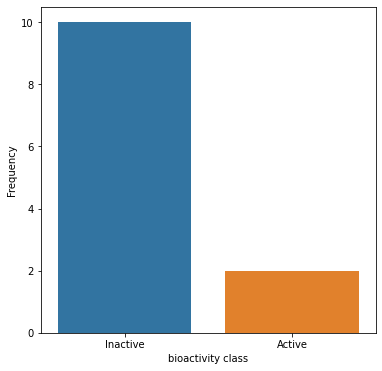

In [24]:
#Frequency Plot for Bioactivity class
plt.figure(figsize=(6,6))
sns. countplot(x='Bioactivity_class', data=combine)
plt.xlabel('bioactivity class')
plt.ylabel('Frequency')


#Check for the correlation

In [19]:

r=combine.corr()

In [20]:
r

,standard_value,MW,LogP,NumHDonors,NumHAcceptors
standard_value,1.000000,-0.638499,-0.520457,-0.691895,-0.609770
MW,-0.638499,1.000000,0.574256,0.931511,0.925139
LogP,-0.520457,0.574256,1.000000,0.651430,0.396429
NumHDonors,-0.691895,0.931511,0.651430,1.000000,0.939418
NumHAcceptors,-0.609770,0.925139,0.396429,0.939418,1.000000


Heat map

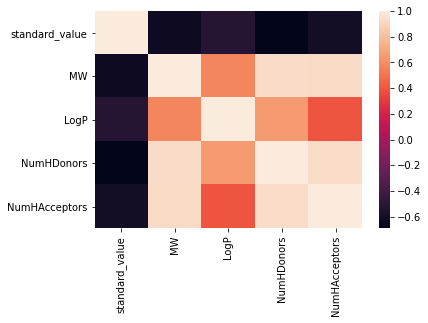

In [21]:
sns.heatmap(r)

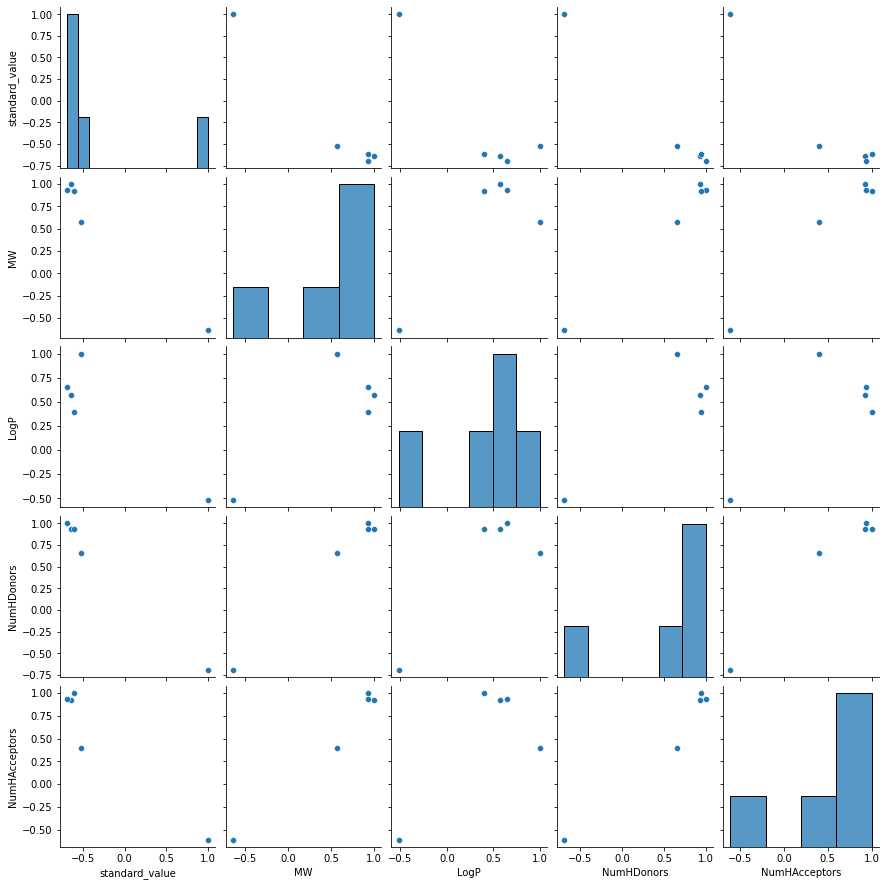

In [22]:
sns.pairplot(r)

From the above heat map and pair plot correlation, it can be understood that, MW has a very good correaltion with No. of H acceptors, followed by No. H donars and poor relation with LogP 

###Scatter plot

Text(0, 0.5, 'LogP')

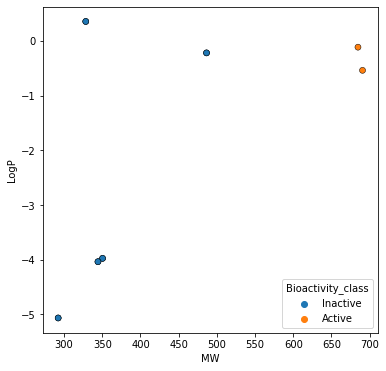

In [26]:
#MW with LogP
plt.figure(figsize=(6,6))
sns.scatterplot(x='MW', y='LogP' , data=combine, hue='Bioactivity_class' , edgecolor='black')

plt.xlabel('MW')
plt.ylabel('LogP')

Text(0, 0.5, 'LogP')

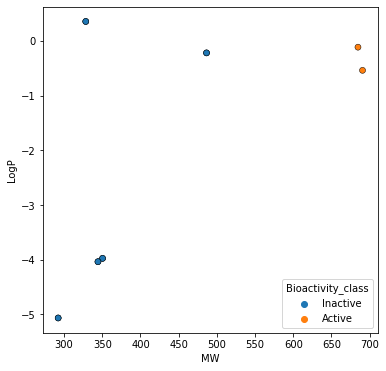

In [31]:
#MW with LogP
plt.figure(figsize=(6,6))
sns.scatterplot(x='MW', y='LogP' , data=combine, hue='Bioactivity_class' , edgecolor='black')

plt.xlabel('MW')
plt.ylabel('LogP')

Text(0, 0.5, 'NumHAcceptors')

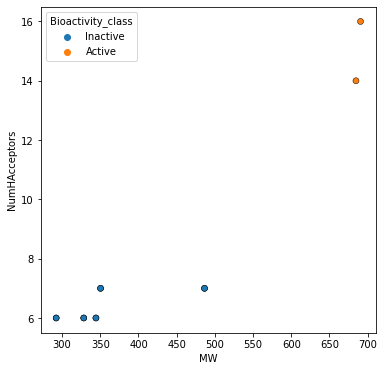

In [32]:
#MW with NumH_Acceptors
plt.figure(figsize=(6,6))
sns.scatterplot(x='MW', y='NumHAcceptors' , data=combine, hue='Bioactivity_class' , edgecolor='black')

plt.xlabel('MW')
plt.ylabel('NumHAcceptors')

Text(0, 0.5, 'NumHDonors')

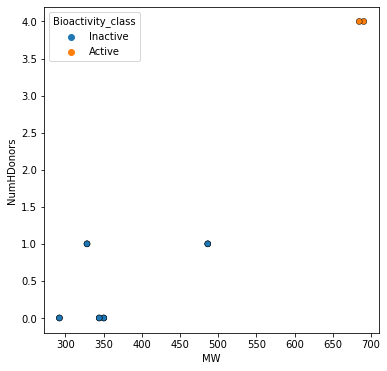

In [33]:
#MW with NumH_Donors
plt.figure(figsize=(6,6))
sns.scatterplot(x='MW', y='NumHDonors' , data=combine, hue='Bioactivity_class' , edgecolor='black')

plt.xlabel('MW')
plt.ylabel('NumHDonors')

###Box Plot

Text(0, 0.5, 'MW')

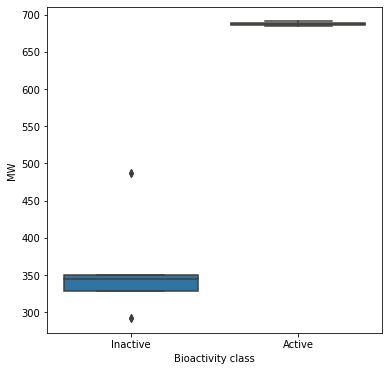

In [37]:
#MW
plt.figure(figsize=(6,6))
sns.boxplot(x = 'Bioactivity_class', y = 'MW', data = combine)

plt.xlabel('Bioactivity class')
plt.ylabel('MW')

Text(0, 0.5, 'LogP')

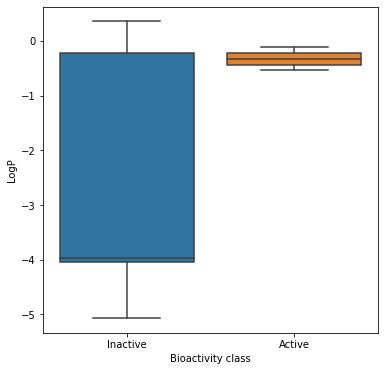

In [38]:
#LogP
plt.figure(figsize=(6,6))
sns.boxplot(x = 'Bioactivity_class', y = 'LogP', data = combine)

plt.xlabel('Bioactivity class')
plt.ylabel('LogP')

Text(0, 0.5, 'Num H Acceptors')

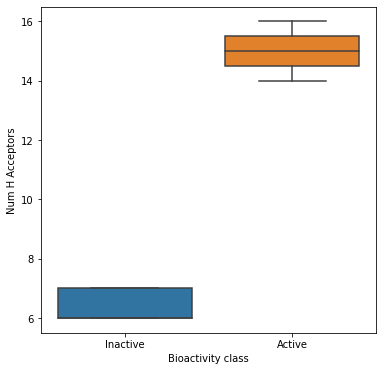

In [39]:
#NumHAcceptors
plt.figure(figsize=(6,6))
sns.boxplot(x = 'Bioactivity_class', y = 'NumHAcceptors', data = combine)

plt.xlabel('Bioactivity class')
plt.ylabel('Num H Acceptors')

Text(0, 0.5, 'Num H Donors')

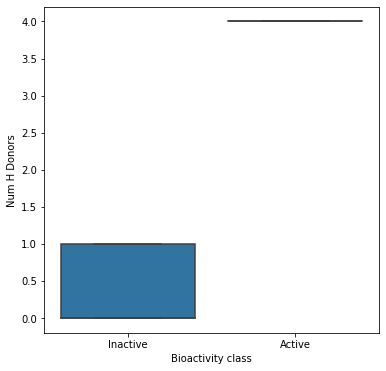

In [40]:
#NumHDonors
plt.figure(figsize=(6,6))
sns.boxplot(x = 'Bioactivity_class', y = 'NumHDonors', data = combine)

plt.xlabel('Bioactivity class')
plt.ylabel('Num H Donors')

##Interpretation from vizualization